# Lab 4 - Predicting a Continous Target and Evaluating Performance
We will:
1. Prepare the data  
2. Train 3 models: Decison Tree, Support Vector Machine (SVM), and Neural Net (NN)  
3. Get Model performance on train and test sets
4. Create appropriate graphs
   

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet


### Section 1. Load and Explore the Data
1.1 Load the dataset 


In [2]:
# 1.1 Load the dataset

howell_full = pd.read_csv("Howell.csv", sep=";")




### Section 2. Visualize Feature Relationships
2.1 Create new features  
  
Compute BMI from height and weight  
Create BMI category

In [15]:

# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)

# new feature
howell_full['bmi'] = bmi(howell_full['height'], howell_full['weight'])


import numpy as np

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])

howell_full['bmi class'].value_counts()

# The following is an array of True/False
over18 = howell_full["age"] > 18

# Only keep the true instances to work with adults
howell_adults = howell_full[over18]

#The not operator is ~ in numpy
howell_children = howell_full[~over18]   


### Plot with Masking
Another way to restrict the instances you use is to apply masking to a numpy array. We replace certain values in the array with a mask. (This is not a NaN... the value is still there, it just won't be used.)

In this plot we are only using the adult instances (howell_adult) and we are going to create masks for male and female  (male is 1 or 0)

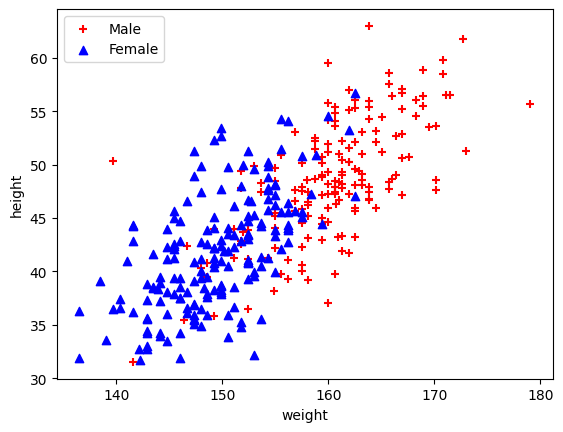

In [16]:
import matplotlib.pyplot as plt

male_height = np.ma.masked_where(howell_adults['male']==0, howell_adults['height'])
female_height = np.ma.masked_where(howell_adults['male']==1, howell_adults['height'])
weight = howell_adults['weight']
plt.scatter(male_height, weight, c='red', marker='+')
plt.scatter(female_height, weight, c='blue', marker='^')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(['Male', 'Female'])
plt.show()




2.2 Choose features and target  
  
First:  
input features: Height  
target: Gender  
    
Second:  
input features: Weight  
target: Gender  
      
Third:  
input features: Height, Weight  
target: Gender  
        
Justify your selections  
Height and weight are likely to show patterns based on gender  
Age could contribute to secondary patterns.  By restricting our data to adults, we help mitigate some of this.

2.3 Define X(features) and y(target)  
  
Comment out or uncomment the appropriate feature set before splitting the data. This code is set to run Case 1 - the inputs are just height.

In [17]:
# Define the input features before splitting
# Case 1: Height only
X = howell_adults[['height']]
y = howell_adults['male']

# Case 2: Weight only
# X = howell_adults[['weight']]
# y = howell_adults['male']

# Case 3: Height + Weight
# X = howell_adults[['height', 'weight']]
# y = howell_adults['male']



Reflection 3:  
Why did you choose these features?  
How might they impact predictions or accuracy?

### Section 3. Train and Analyze a Linear Regression Model  
  
3.1 Define X (features) and y (target) for Height --> Weight  
  
First,  use height to predict weight using the full Howell dataset. Note that each input should be an array, so we have an array of arrays (hence the double brackets on inputs). 

In [3]:
X = howell_full[['height']]
y = howell_full['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


3.2 Train a Simple Linear Regression Model for Height --> Weight 
  
Create a LinearRegression model. Check the imports up above - what package does this class come from? (Hint: see the line from sklearn.linear_model import LinearRegression). 

In [4]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)



LinearRegression()

3.3 Report Performance Metrics on Training Data for Height --> Weight  
  
Get the predictions of the model on the training data.

In [5]:
# Predict and evaluate training data (X train)

y_pred = lr_model.predict(X_train)


In [6]:
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2 ', r2_score(y_train,y_pred))


Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -34.33484184267892
 Coefficients [0.50625269]
 Score 0.8892970528522413
MAE is  3.986801374333733
RMSE is  4.901419255121661
MSE is  24.02391071447738
R^2  0.8892970528522413


3.4 Report performance metrics on test data for Height --> Weight  
  
We now want to get the performance of the model on the test data. Add the following lines - or better yet, copy the whole section from above, and make the changes to use the test data instead. 

In [7]:
# Predict and evaluate test data
y_test_pred = lr_model.predict(X_test)


In [8]:
print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on test data
MAE is  4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2  0.8677460846087206


3.5 Visualize Height --> Weight  
  
We are now going to generate a list of heights and feed those values into the model to get corresponding weight predictions. 
  
1. Find the minimum value in the training set heights.
2. Find the maximum value in the training set height.
3. Set the number of points we want in the line plot. More will look smoother. 
4. Determine the spacing so it is even.
  


In [9]:
min_height = X_train['height'].min()
max_height = X_train['height'].max()
points = 200
step_by = (max_height - min_height)/(points-1)


Step 2: Generate evenly spaced height values and predict corresponding weights:  
  
Use a list comprehension to create a list of evenly spaced height values.  
  
Use a list comprehension to calculate inputs. We use x values from the list we just created. Again, the model is expecting a 2D array of inputs (each input must itself be an array). So we convert each x-value into a one-element array (hence the double brackets on inputs). 
  
Read a list comprehension as 

"Return _ for each _ in _"      or
"Return this for each i in the range from 0 up to but not including 200 (our number of points)"  
  
The range() function in Python is a generator-like object — it yields numbers from 0 to 199.


In [10]:
# Create a list of evenly spaced height values
x_values = [min_height + i*step_by for i in range(0, points)]

# Prepare inputs for the model (each input must be a 1-element list)
inputs = [[x] for x in x_values]

# Predict weights using the trained model
y_values = lr_model.predict(inputs)


c:\Projects\applied-ml-terry\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step 3: Plot the training data and the prediction line:  
  
Do a line plot. It will overlay on the points. Make the color of the line red for better visibility.

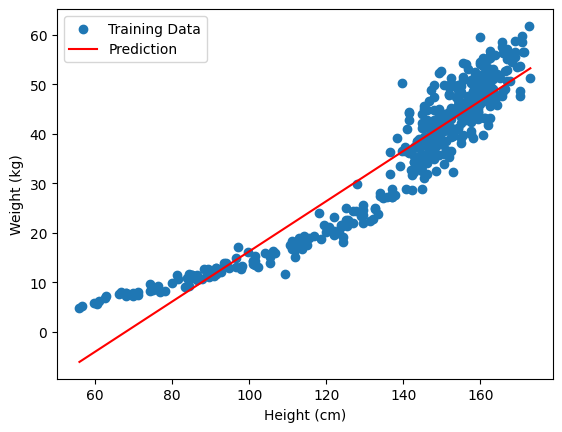

In [11]:
# Plot training data
plt.scatter(X_train['height'], y_train, label='Training Data')

# Overlay predicted line
plt.plot(x_values, y_values, color='red', label='Prediction')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()


3.6 Add a Feature to the Model (height, age --> weight)  
  
We will now include a second feature (age) to improve prediction accuracy.  
  
Use the full Howell dataset with both height and age as input features:

In [12]:
X = howell_full[['height', 'age']]
y = howell_full['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


4.4 Report Confusion Matrix (as a heatmap)  
  
  Plot a confusion matrix:

Train the new model:

In [13]:
lrTwoInputModel = LinearRegression()
lrTwoInputModel.fit(X_train, y_train)



LinearRegression()

Evaluate performance on training data:


In [14]:
y_pred = lrTwoInputModel.predict(X_train)

print('Results for linear regression on training data')
print('Input: Height, age')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lrTwoInputModel.intercept_)
print('   Coefficients', lrTwoInputModel.coef_)
print('   Score', lrTwoInputModel.score(X_train, y_train))
print('MAE is  ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2    ', r2_score(y_train, y_pred))



Results for linear regression on training data
Input: Height, age
  Default settings
Internal parameters:
   Bias is  -32.981786351678274
   Coefficients [0.48959129 0.03198353]
   Score 0.8903963296817052
MAE is   3.9844579179380495
RMSE is  4.877023070139709
MSE is  23.78535402667495
R^2     0.8903963296817052


Now evaluate on the test data:

In [15]:
y_test_pred = lrTwoInputModel.predict(X_test)

print()
print('Results for linear regression on test data')
print('Input: Height, age')
print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))



Results for linear regression on test data
Input: Height, age
MAE is   4.1967168519461024
RMSE is  5.1834661256248555
MSE is  26.868321075500354
R^2     0.8738901268956871


Reflection 3  
  
How accurate was the model?  
  
Look at the performance of the model on the training and test sets and
make an argument on whether the model is underfitting the training set.  
  
Looking at the plot, can we improve the fit of the model significantly by
adding more training instances? Does this indicate under or over fitting by
the model?

### Section 4. Train and Analyze a Polynomial Regression Model  
  
Using height to predict weight, try a polynomial model firts with degree 3, then with degree 8.  
  
4.1 Height --> Weight, Degree 3 (Training)

In [16]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)



LinearRegression()

In [17]:
y_pred = poly_model.predict(X_poly)
print('Results for polynomial regression (degree 3) on training data')
print(' R²:', r2_score(y_train, y_pred))


Results for polynomial regression (degree 3) on training data
 R²: 0.9444139259347676


4.2 Height --> Weight, Degree 3 (Test)  

Evaluate on test data

In [18]:
y_test_pred = poly_model.predict(X_poly_test)
print('Results for polynomial regression (degree 3) on test data')
print(' R²:', r2_score(y_test, y_test_pred))


Results for polynomial regression (degree 3) on test data
 R²: 0.9307646558468141


4.3 Height --> Weight, Degree 8 (Training)  

Increase degree to 8:

In [19]:
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)


LinearRegression()

4.4 Height --> Weight, Degree 8 (Test)  
  
Evaluate on test data

In [20]:
y_test_pred = poly_model.predict(X_poly_test)
print('Results for polynomial regression (degree 8) on test data')
print(' R²:', r2_score(y_test, y_test_pred))


Results for polynomial regression (degree 8) on test data
 R²: 0.9244815709915721


Reflection 4  
  
Did the polynomial model improve performance?  
Does it seem to overfit the data?

### Section 5. Train and Analyze a Regularized Model (Elastic Net)  
  
Elastic Net is a regularized regression model that combines L1 (Lasso) and L2 (Ridge) penalties. It helps prevent overfitting, especially when using high-degree polynomial features.  
  
First apply the model on the training set, and then evaluate it on the test set to see how it performs. 

5.1 Height --> Weight, Degree 8 (Training)

In [21]:
reg_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_model.fit(X_poly, y_train)


c:\Projects\applied-ml-terry\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.3)

5.2 Height --> Weight, Degree 8 (Test)

In [22]:
y_test_pred = reg_model.predict(X_poly_test)
print('Results for Elastic Net on test data')
print(' R²:', r2_score(y_test, y_test_pred))


Results for Elastic Net on test data
 R²: 0.9296382020969839


Reflection 5  
  
Did regularization improve the performance?  
Did the regularized model reduce overfitting?

### Section 6. Final Thoughts & Insights  
  
6.1 Summarize Findings  
  
Display table shown above.  
  
Reflection 6  
  
How well did the models perform?  
Which model overfit the data?  
Did the regularized model reduce overfitting?  
How did adding age impact the results?

Playing With Hyperparameters  
  
Test different degrees for polynomial regression.  
Try varying aplphaa and L1_ratio for Elastic Net.